In [4]:
import numpy as np
import matplotlib.pyplot as plt
resultsFolder = 'results/continuos/tests/'
def get_value(filename):

    dataRL = np.genfromtxt(resultsFolder + filename + 'RL.csv', delimiter=',')
    dataIRL = np.genfromtxt(resultsFolder + filename + 'IRL.csv', delimiter=',')
    meansRL = np.mean(dataRL, axis=0)
    meansIRL = np.mean(dataIRL, axis=0)
    print('meansRL', np.average(meansRL), np.max(meansRL), np.min(meansRL), dataRL.shape)
    print('meansIRL', np.average(meansIRL), np.max(meansIRL), np.min(meansIRL), dataIRL.shape)

    RL = get_avg(meansRL)
    IRL = get_avg(meansIRL)

    return RL, IRL

def get_avg(data):
    rewards = data.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r
    for i in range(len(rewards)):
        if i == 0:
            avg_reward[i] = rewards[i]
        else:
            avg_reward[i] = (cumulative_rewards[i] - cumulative_rewards[0])
            
    return avg_reward

In [5]:
def plotRewards(filename, data_RL, data_IRL):
   
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    plt.figure('Collected reward')
    plt.suptitle('Collected reward')

    plt.plot(data_IRL, label = 'Average reward IRL', linestyle = '--', color =  'r')
    plt.plot(data_RL, label = 'Average reward RL', linestyle = '--', color = 'y' )


    plt.legend(loc=4,prop={'size':12})
    plt.xlabel('Episodes')
    plt.ylabel('Avg Reward')

    plt.savefig(resultsFolder + filename + '.png')

    plt.show()

meansRL 35.84 100.0 8.5 (2, 100)
meansIRL 74.475 100.0 10.5 (2, 100)


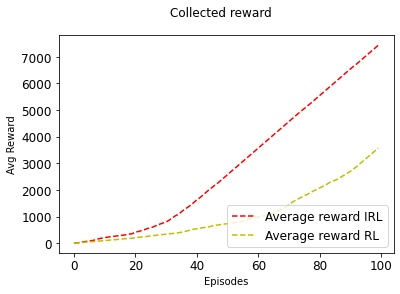

In [6]:
RL, IRL = get_value("rewards")
plotRewards("rewards", RL, IRL)

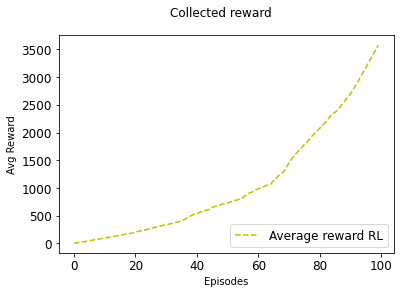

In [9]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

plt.figure('Collected reward')
plt.suptitle('Collected reward')

plt.plot(RL, label = 'Average reward RL', linestyle = '--', color = 'y' )


plt.legend(loc=4,prop={'size':12})
plt.xlabel('Episodes')
plt.ylabel('Avg Reward')

plt.show()